In [3]:
using DataFrames, CSV, LinearAlgebra
using GLM, StatsModels, Plots


## 1 ##

function lsqr(A, b, w=ones(size(A, 1)))
    W = diagm(w)      #trasforms vector into diagonal matrix
    F = qr(W^(1/2)*A)     
    Q1 = Matrix(F.Q)  # the first n columns of Q
    R = F.R
    # now A == Q1*R
    # and x = PR^(-1)Q1'y
    x = R \ Q1'* (W^(1/2)*b)  # triangular substitution to solve Rx = Q1'b
                   # if pivoting was performed, then x = Px
end

lsqr (generic function with 2 methods)

In [5]:
## 2 ##
Trees = CSV.read("cherry-trees.csv", DataFrame)

fo = @formula(Volume ~ 1 + Girth)
A = modelmatrix(fo.rhs, Trees)      # the predictors
b = vec(modelmatrix(fo.lhs, Trees)) # the response
w = vcat(.5, ones(29), .5)          # the weights

x_ls = lsqr(A, b)       # solve using regular least squares
x_wls = lsqr(A, b, w)   # solve using weighted least squares

println("least squares parameters: ", x_ls)
println("weighted least squares parameters: ", x_wls)

least squares parameters: [-21.14850686134058, 3.8558648957914743]
weighted least squares parameters: [-26.916913265928713, 4.278883023287975]


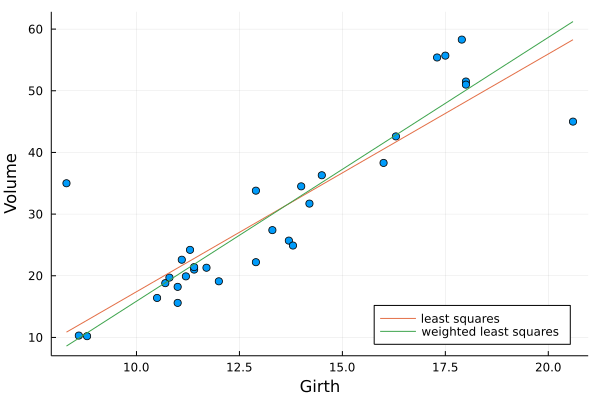

In [7]:
## 3 ##

# plot the two regression lines
scatter(A[:,2], b, label="", xlabel="Girth", ylabel="Volume")
g(x) = x_ls[1] + x_ls[2]*x    # the least squares regression line
h(x) = x_wls[1] + x_wls[2]*x  # the weighted least squares regression line
plot!(g, label = "least squares", legend = :bottomright, fmt = :png)
plot!(h, label = "weighted least squares", legend = :bottomright)

# the weighted least squares places less significance on the first and last observations
# these two observations are outliers to the rest of the data
# this results in a model the fits most of the data better